In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets, model_selection, metrics
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import boxcox
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr



from functions import * 

# Print a confirmation message
print("Libraries imported successfully!")

Libraries imported successfully!


# Load data 

In [2]:
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_demo.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3


In [3]:
df_experiment = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()



,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [4]:
df_web = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Merge the 3 dataframes on the 'client_id' column

In [5]:
# Merging df_demo and df_experiment, df_web, on client_id
df3 = merge_3(df_demo, df_experiment, df_web)
df3.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.3,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


### Convert 'date_time' to datetime Format

In [6]:
# (Nat)f_2.1.Convert to datetime
df3_processed_date = process_datetime(df3, datetime_column='date_time', sort_columns=['visit_id', 'date_time'])
df3_processed_date.head(10)


,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time
300510,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
300509,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
76889,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56
76888,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12
76887,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21
76886,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35
76885,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41
76884,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45
76883,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59
76882,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04


### Check that each visit_id has only 1 "confirm" step

In [7]:
# (Nat)f_2.2.Check that each visit_id has only 1 "confirm" step
count_duplicate_confirms(df3_processed_date)

duplicated 'confirm' steps: 3713


### Remove duplicated 'confirm' steps (keep only 1st occurrence)

In [8]:
# (Nat)f_2.3.Remove duplicated 'confirm' steps (keep only 1st occurrence)
df_cleaned_no_duplicated_confirms_step = remove_duplicate_confirms(df3_processed_date)
count_duplicate_confirms(df_cleaned_no_duplicated_confirms_step)

duplicated 'confirm' steps: 0


# KPIs:
1.Completion Rate. Hypothesis: Group "Test" has 5% increase in completion rate compare to "Control"

2.Time spent  per visit. How does it correlated with Completion within the visit?  What could be recommendations on improvements?

3.Time spent per step. % of users that we loose on each step in both groups ? What could be recommendations on improvements?

4.Support. How the call center is solicited in each group? by which segments of users ?

5.Usage of new and old design.How often the user in each group logons_6_month ? by which segments of users ?

# KPI-1 Completion rate


1. Calculate Completion Rate per day
2. Check the histogram first to see the distribution
3. Remove outliers (IQR, standard deviation methods)
4. Transform (Log, Square Root, Box-Cox)
5. Standardization (`StandardScaler` from sklearn)
6. Normalize (`MinMaxScaler` from the `sklearn.preprocessing` module)
7. Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.

### Calculate Completion Rate per day

In [9]:
# (Nat)f_2.4.Calculate Completion Rate per day
completion_rate_day = completion_rate_day(df_cleaned_no_duplicated_confirms_step)
completion_rate_day

,date,variation,completions,total_visits,completion_rate_per_day
0,2017-03-15,Control,77,121,0.636364
1,2017-03-15,Test,87,146,0.595890
2,2017-03-16,Control,23,47,0.489362
3,2017-03-16,Test,35,56,0.625000
4,2017-03-17,Control,10,24,0.416667
...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879
192,2017-06-19,Control,100,186,0.537634
193,2017-06-19,Test,95,165,0.575758
194,2017-06-20,Control,126,223,0.565022


### Calculate_average_completion_rate_by_group

In [10]:
# (Nat)f_2.5.calculate_difference_in_average_completion_rates :
average_completion_rates_per_group = calculate_difference_in_avg_completion_rates(completion_rate_day)
average_completion_rates_per_group

(  Variation  average_completion_rate
 0   Control                 0.492034
 1      Test                 0.567121,
 0.07508755426657343)

### Histogram: Visualize the distribution

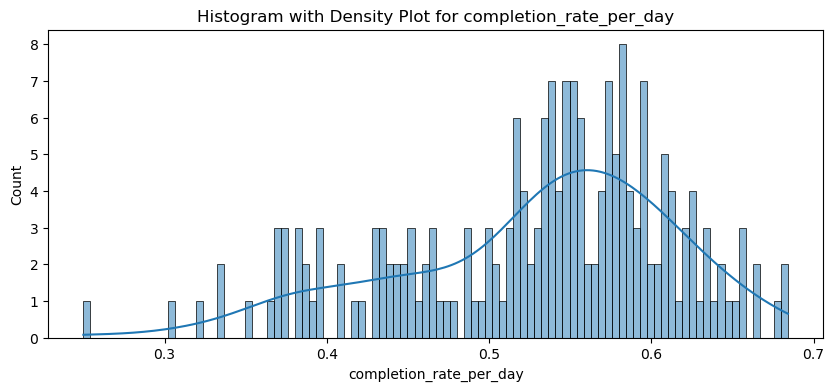

In [11]:
# (Nat)f_2.6.Check if the data is normally distributed with Histogram in completion rate per day
histogram_with_density_plot(completion_rate_day, 'completion_rate_per_day')

### Q-Q Plot: Check how well the data follows a normal distribution.

((array([-2.69398007, -2.38376686, -2.20689251, -2.08020554, -1.9801044 ,
         -1.89662906, -1.82459593, -1.76094837, -1.70372617, -1.65159387,
         -1.60359894, -1.5590371 , -1.5173723 , -1.47818664, -1.44114776,
         -1.40598676, -1.37248286, -1.34045247, -1.3097412 , -1.28021789,
         -1.25177015, -1.22430088, -1.1977256 , -1.17197032, -1.14696984,
         -1.1226664 , -1.0990086 , -1.07595042, -1.05345055, -1.03147173,
         -1.0099802 , -0.98894533, -0.96833918, -0.94813621, -0.928313  ,
         -0.90884804, -0.88972147, -0.87091498, -0.85241159, -0.83419554,
         -0.81625218, -0.79856785, -0.78112982, -0.76392613, -0.74694564,
         -0.73017783, -0.71361286, -0.69724142, -0.68105477, -0.66504463,
         -0.64920317, -0.63352298, -0.61799704, -0.60261866, -0.58738149,
         -0.5722795 , -0.55730692, -0.54245825, -0.52772823, -0.51311183,
         -0.49860425, -0.48420087, -0.46989724, -0.45568911, -0.44157239,
         -0.42754313, -0.41359751, -0.

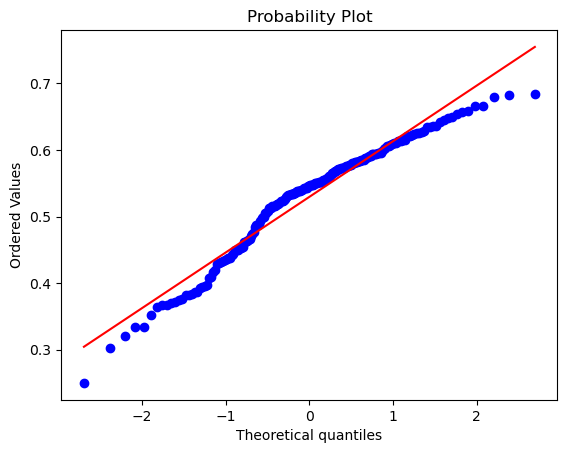

In [12]:
# Q-Q Plot: Check how well the data follows a normal distribution
stats.probplot(completion_rate_day['completion_rate_per_day'], plot=plt)

### Remove outliers from completion rate per day with Standard Deviation Method

In [13]:
# (Nat)f_2.7.Remove outliers from data  with Standard Deviation Method.
completion_rate_day_no_outliers = remove_outliers_std(completion_rate_day, 'completion_rate_per_day', num_std=3)
completion_rate_day_no_outliers

,date,variation,completions,total_visits,completion_rate_per_day
0,2017-03-15,Control,77,121,0.636364
1,2017-03-15,Test,87,146,0.595890
2,2017-03-16,Control,23,47,0.489362
3,2017-03-16,Test,35,56,0.625000
4,2017-03-17,Control,10,24,0.416667
...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879
192,2017-06-19,Control,100,186,0.537634
193,2017-06-19,Test,95,165,0.575758
194,2017-06-20,Control,126,223,0.565022


### Transform data with Box Cox method to make it normally distributed 

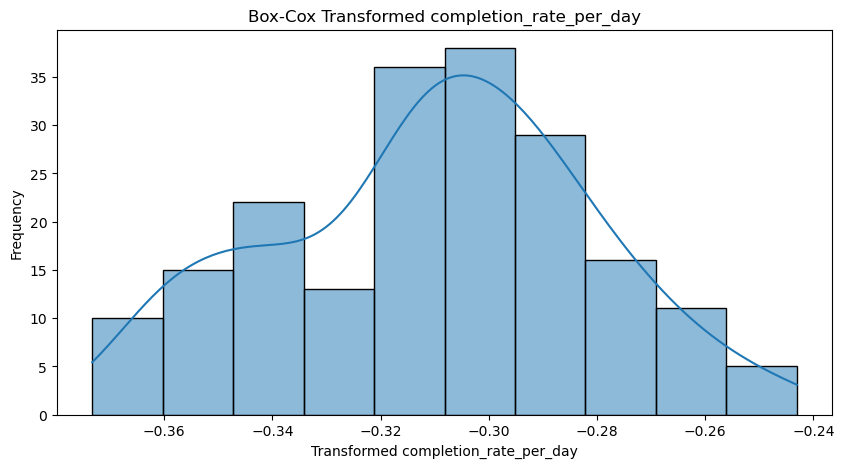

/Users/8mars/Documents/1IRONHACK/projects/Vanguard_Project/notebooks/functions.py:392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column_name}_BoxCox'] = transformed_data


In [14]:
# (Nat)f_2.9.Transform data with Box Cox method to make it normally distributed 
completion_rate_day_boxcox = apply_boxcox_and_plot(completion_rate_day_no_outliers, 'completion_rate_per_day')

### Q-Q plot  after box-cox transformation:

((array([-2.69227775, -2.38188725, -2.20489564, -2.07811611, -1.97793611,
         -1.89439075, -1.82229385, -1.75858714, -1.70130938, -1.64912438,
         -1.60107908, -1.55646882, -1.51475721, -1.47552613, -1.43844301,
         -1.40323879, -1.36969256, -1.33762061, -1.30686846, -1.27730486,
         -1.24881735, -1.22130877, -1.19469457, -1.16890073, -1.14386198,
         -1.11952055, -1.09582498, -1.07272922, -1.05019194, -1.02817584,
         -1.00664715, -0.98557519, -0.96493201, -0.94469206, -0.92483189,
         -0.90532996, -0.88616642, -0.86732291, -0.84878246, -0.83052928,
         -0.81254871, -0.79482707, -0.77735162, -0.7601104 , -0.74309223,
         -0.7262866 , -0.70968364, -0.69327404, -0.67704905, -0.66100036,
         -0.64512014, -0.62940097, -0.61383581, -0.59841797, -0.58314109,
         -0.56799911, -0.55298625, -0.53809702, -0.52332613, -0.50866855,
         -0.49411946, -0.47967422, -0.46532838, -0.45107768, -0.43691801,
         -0.42284541, -0.40885605, -0.

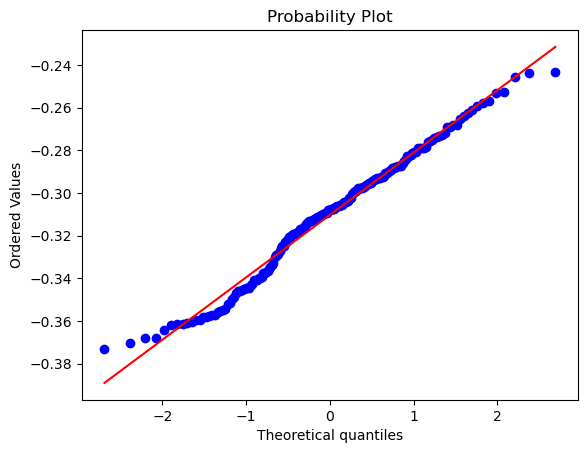

In [15]:
#Q-Q plot after box-cox transformation:
stats.probplot(completion_rate_day_boxcox['completion_rate_per_day_BoxCox'], plot=plt)

### Apply normalization to completion_rate_day_boxcox['completion_rate_per_day_BoxCox'] col:

In [16]:
# (Nat)f_2.10.Apply normalization to completion_rate_day_boxcox['completion_rate_per_day_BoxCox'] col:
def normalize_column(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(
            f"Column '{column_name}' does not exist in the DataFrame")

    # Extract the column to be normalized
    data_to_normalize = df[[column_name]].copy()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data
    normalized_data = scaler.fit_transform(data_to_normalize)

    # Add the normalized data back to the DataFrame using .loc to avoid SettingWithCopyWarning
    normalized_column_name = column_name + '_Normalized'
    df.loc[:, normalized_column_name] = normalized_data

    return df
completion_rate_day_final_normalized = normalize_column(completion_rate_day_boxcox, 'completion_rate_per_day_BoxCox')
completion_rate_day_final_normalized


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/2882142480.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, normalized_column_name] = normalized_data


,date,variation,completions,total_visits,completion_rate_per_day,completion_rate_per_day_BoxCox,completion_rate_per_day_BoxCox_Normalized
0,2017-03-15,Control,77,121,0.636364,-0.268192,0.807092
1,2017-03-15,Test,87,146,0.595890,-0.287279,0.660542
2,2017-03-16,Control,23,47,0.489362,-0.328578,0.343455
3,2017-03-16,Test,35,56,0.625000,-0.273748,0.764432
4,2017-03-17,Control,10,24,0.416667,-0.349865,0.180023
...,...,...,...,...,...,...,...
191,2017-06-18,Test,71,132,0.537879,-0.311325,0.475924
192,2017-06-19,Control,100,186,0.537634,-0.311418,0.475207
193,2017-06-19,Test,95,165,0.575758,-0.296058,0.593139
194,2017-06-20,Control,126,223,0.565022,-0.300549,0.558660


### Check calculate_difference_in_completion_rates after Remove Outliers, BoxCox Transf and Normalization:

In [17]:
# (Nat)f_2.5.calculate_difference_in_average_completion_rates after Remove Outliers, BoxCox Transf and Standardization:
average_completion_rates_per_group, difference = calculate_difference_in_avg_completion_rates(completion_rate_day_final_normalized)
print("Average Completion Rates by Group:\n", average_completion_rates_per_group)
print("Difference in Completion Rates: ", difference if difference is not None else "N/A")

Average Completion Rates by Group:
   Variation  average_completion_rate
0   Control                 0.494529
1      Test                 0.567121
Difference in Completion Rates:  0.07259235983464868


### Save to csv the processed file completion_rate_day_boxcox_normalized

In [18]:
#export df_time_per_visit_no_outliers_std df to csv:
completion_rate_day_final_normalized.to_csv('../data/cleaned/df_completion_rate_day_final_normalized.csv', index=False)

### Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.

In [19]:
# (Nat)f_2.10.1.Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.
hypothesis_testing_completion_rate_result = perform_two_sample_t_test(average_completion_rates_per_group)
hypothesis_testing_completion_rate_result

{'T-statistic': 3.195042168417333,
 'P-value': 0.0008135408272973432,
 'Interpretation': "Reject the null hypothesis: There is significant evidence that the 'Test' group's completion rate is more than 5% higher than the 'Control' group."}

### Calculate whether the average age of clients engaging with the new process is the same as those engaging with the old process

In [20]:
# (Nat)f_2.11.Calculate whether the average age of clients engaging with the new process is the same as those engaging with the old process
completion_rates_df, increase_in_age = calculate_completion_rate_age(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print(f"Increase in average age for Test group compared to Control group:,  {increase_in_age:.2%} ")

  variation  completion_rate  completed_visits  total_visits  average_age
0   Control         0.496691             15988         32189    48.222558
1      Test         0.584139             21692         37135    48.671740
Increase in average age for Test group compared to Control group:,  93.15% 


### Check if the average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

In [21]:
# (Nat)f_2.12.Check if the average client tenure (how long they've been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
completion_rates_df, increase_in_tenure = calculate_completion_rate_tenure_months(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)
print(f"Increase in average tenure months for Test group compared to Control group, % :,  {increase_in_tenure:.2%}")

  variation  completion_rate  average_tenure_months
0   Control         0.496691             151.823496
1      Test         0.584139             152.035431
Increase in average tenure months for Test group compared to Control group, % :,  0.14%


### Check if there are gender differences that affect engaging with the new or old process

In [22]:
# (Nat)f_2.13.Check if there are gender differences that affect engaging with the new or old process
completion_rates_df = calculate_completion_rate_gender(df_cleaned_no_duplicated_confirms_step)
print(completion_rates_df)

Increase in completion rate for males (Test vs Control): 10.11%
Increase in completion rate for females (Test vs Control): 8.31%
              Group  Completion Rate
0       Test - Male         0.598341
1     Test - Female         0.561362
2    Control - Male         0.497205
3  Control - Female         0.478311


# KPI-2.Time spent per visit

### Time spent  per visit. How does it correlated with Completion in the visit?. 
1. Create a col 'completed_yes_no' per each visit_id
2. Calculate 'time_per_visit'
3. Check the distribution of 'time_per_visit' with histogram
4. Remove outliers (IQR, standard deviation methods) from 'time_per_visit'
5. Check if 'time_per_visit' is correlated with 'completed_yes_no'

### 1. Create a col 'completed_yes_no' per each visit_id and 2. Calculate 'time_per_visit'

In [23]:
# (Nat)f_3.1.Calculate time spent per visit and determine if the visit was completed
time_per_visit_completion = calculate_time_and_completion(df_cleaned_no_duplicated_confirms_step)
time_per_visit_completion.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time,date,completed_yes_no,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,1,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,0,242
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,start,2017-05-23 20:44:01,2017-05-23,0,180
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22,0,0
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,2017-04-14,0,132


### 3. Check if the time spent for each visit is normally distributed with Histogram, check outliers with Boxplot, Shapiro-Wilk test

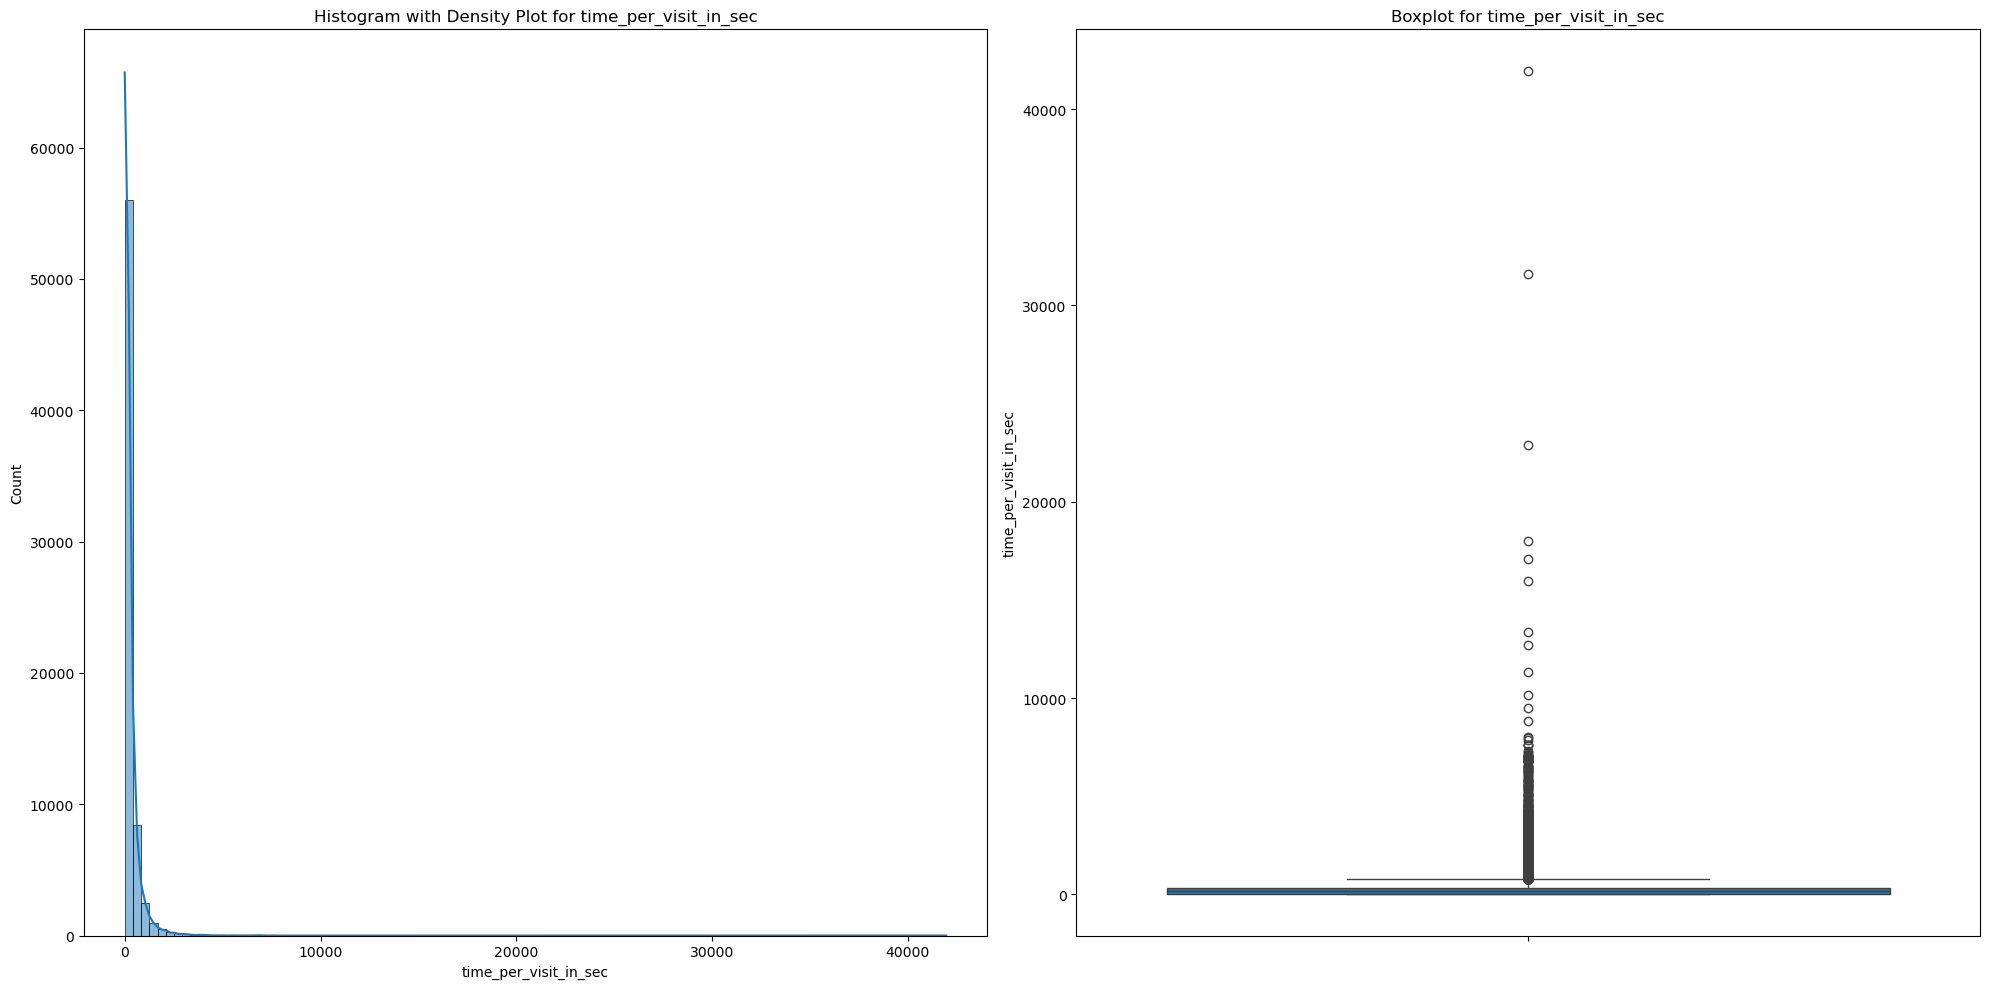

In [24]:
# (Nat)f_3.2.Check if the time spent for each visit is normally distributed with Histogram and Boxplot to visually check for outliers
histogram_distribution_boxplot_outliers(time_per_visit_completion, 'time_per_visit_in_sec')

Shapiro-Wilk test to check if data time_per_visit is normally distributed

In [25]:
# (Nat)f_3.3.Shapiro-Wilk test to check if data time_per_visit is normally distributed
shapiro_wilk_test(time_per_visit_completion, 'time_per_visit_in_sec')

Shapiro-Wilk Test for time_per_visit_in_sec: Statistics=0.443, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69205.
  res = hypotest_fun_out(*samples, **kwds)


### 4. Removing outliers

### 4.1. Remove outliers from data time_per_visit with Standard Deviation Method.

In [26]:
# (Nat)f_2.7.Remove outliers from data time_per_visit with Standard Deviation Method.
time_per_visit_completion_std= remove_outliers_std(time_per_visit_completion, 'time_per_visit_in_sec')

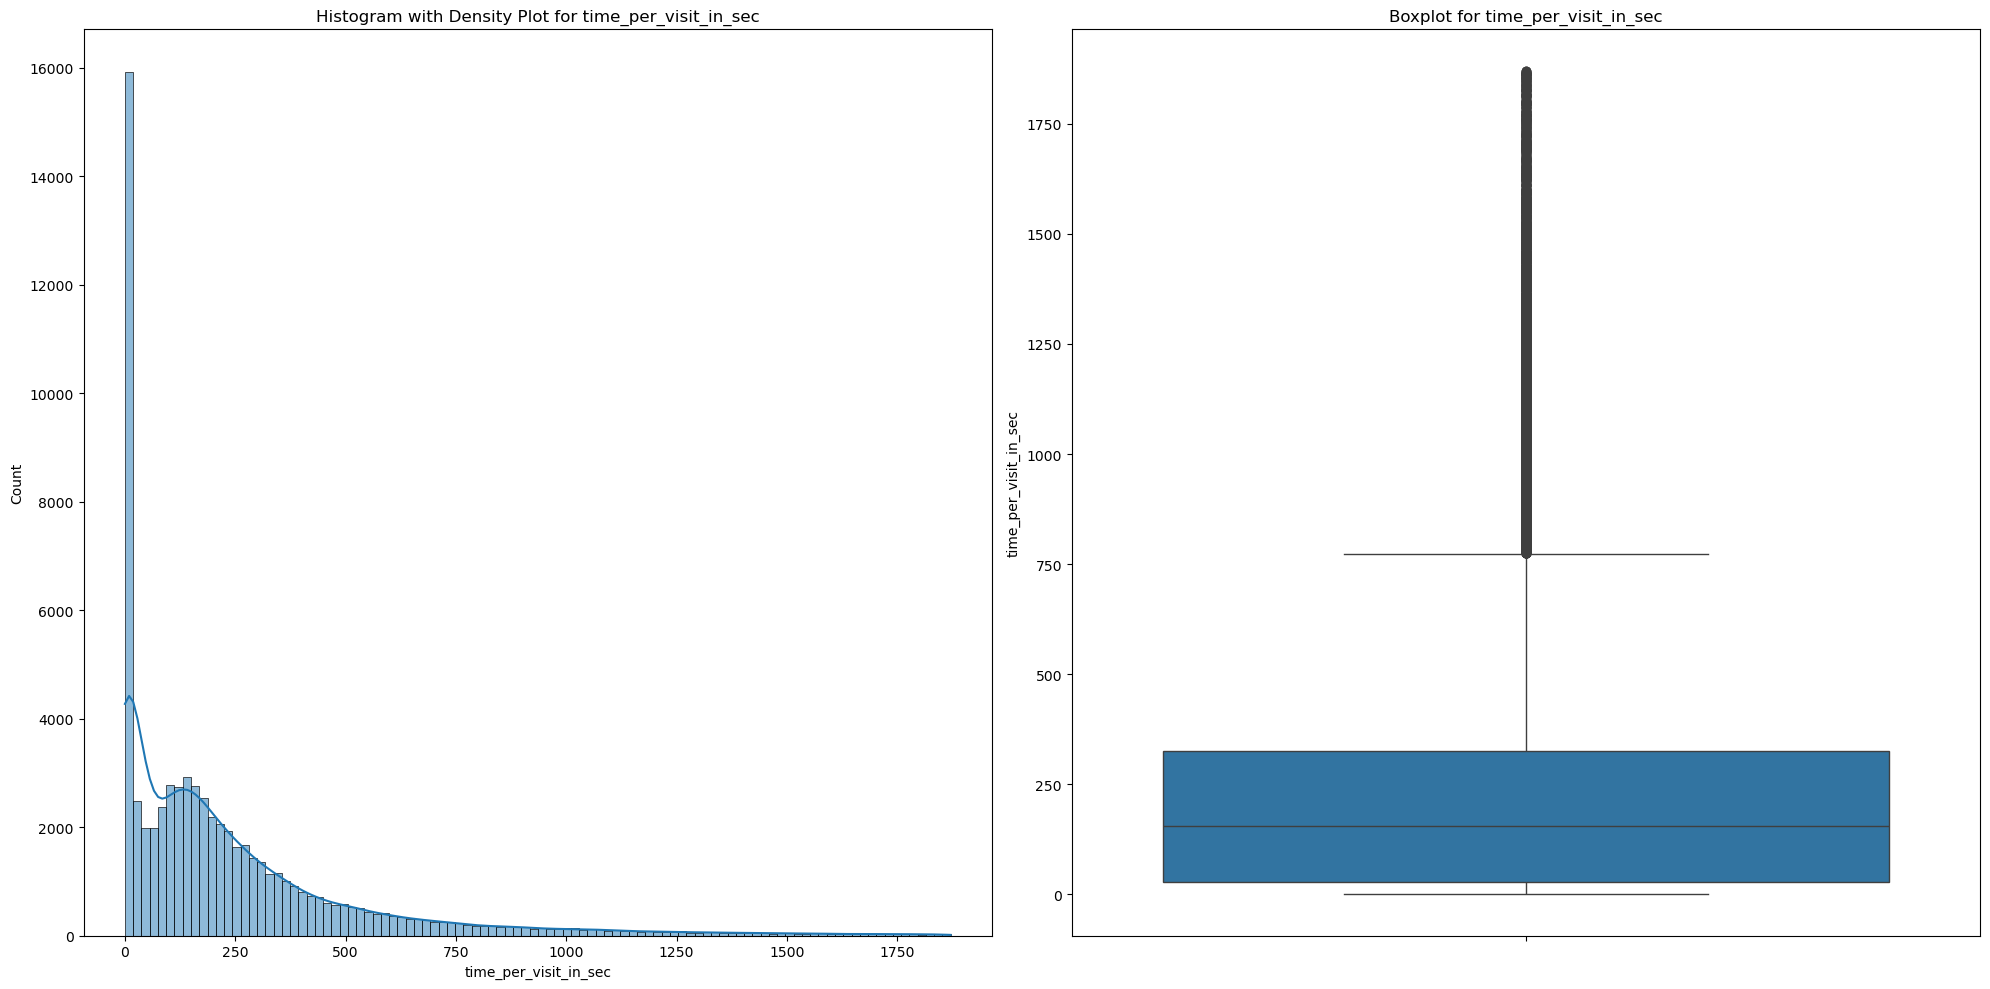

In [27]:
# check without outliers:
histogram_distribution_boxplot_outliers(time_per_visit_completion_std, 'time_per_visit_in_sec')

### 4.2. Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method

In [28]:
# (Nat)f_2.8.Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method
time_per_visit_completion_iqr = remove_outliers_iqr(time_per_visit_completion, 'time_per_visit_in_sec')

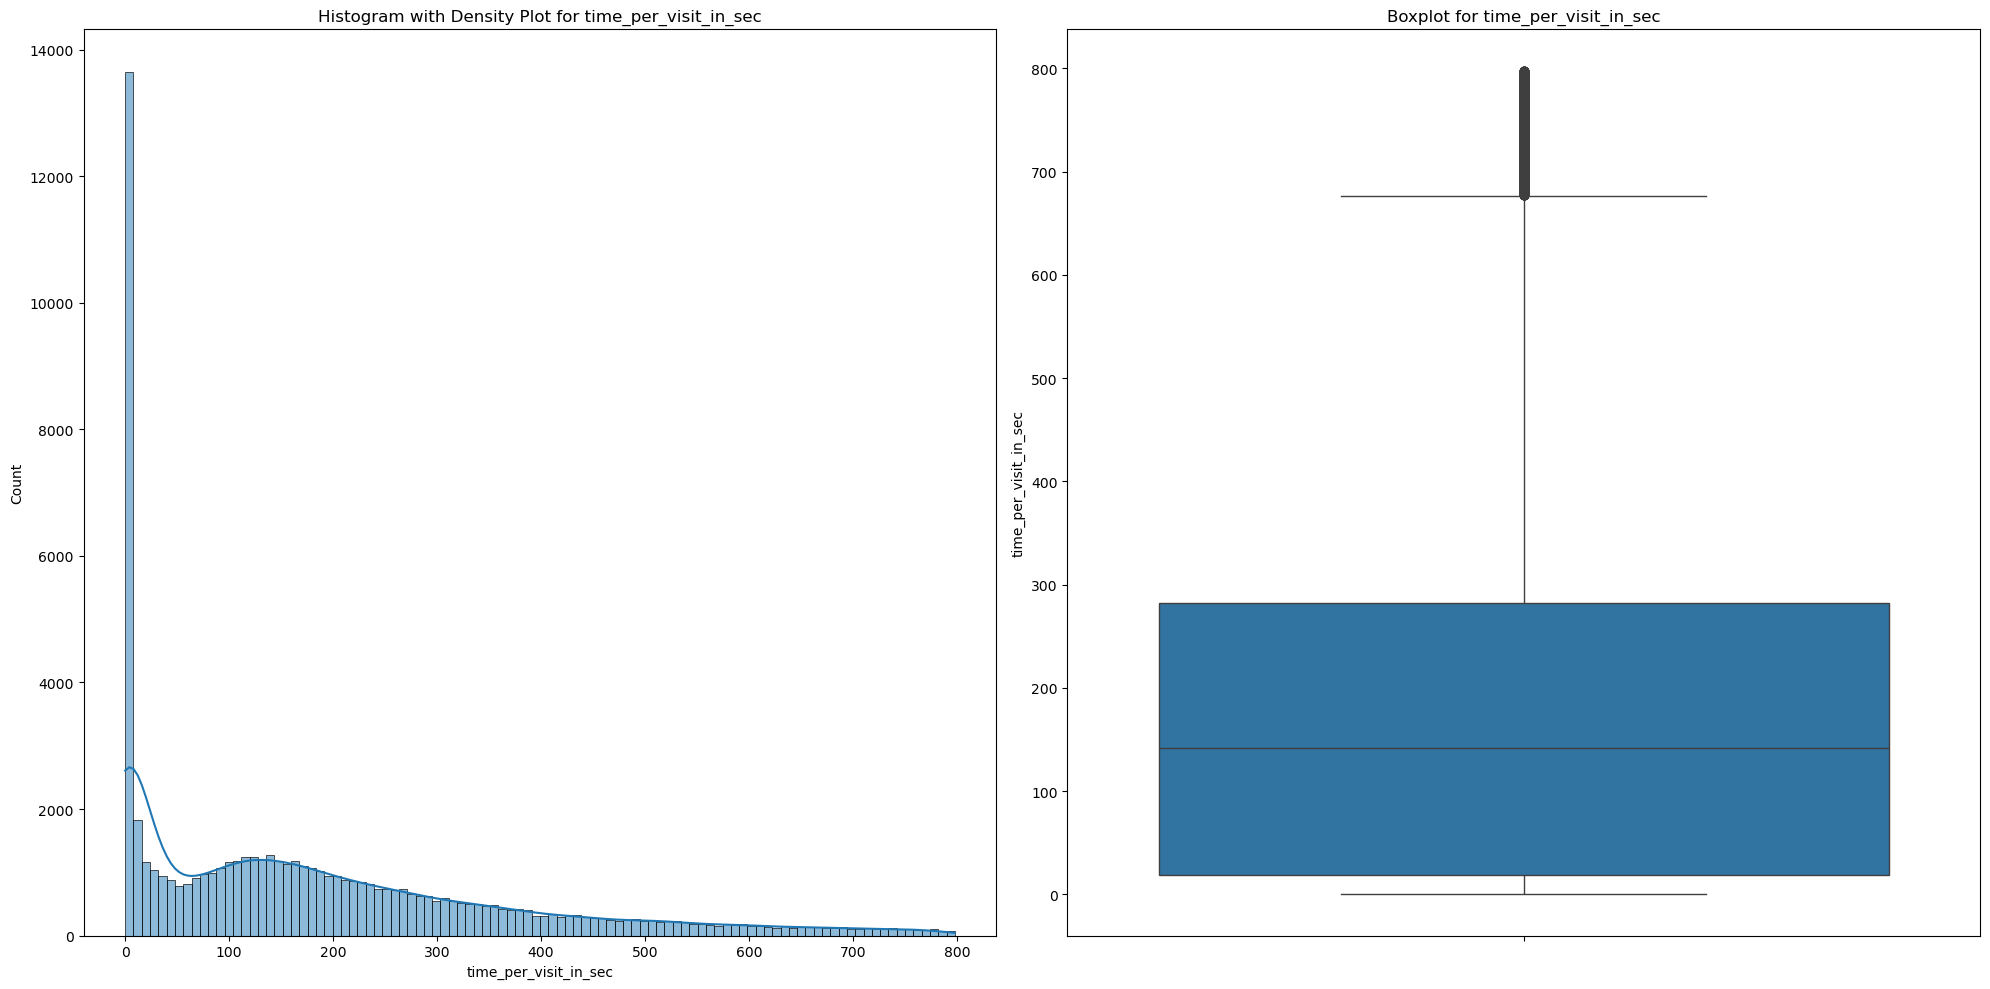

In [29]:
# check without outliers:
histogram_distribution_boxplot_outliers(time_per_visit_completion_iqr, 'time_per_visit_in_sec')

In [30]:
#export df_time_per_visit_no_outliers_std df to csv:
time_per_visit_completion_iqr.to_csv('../data/cleaned/df_time_per_visit_no_outliers_iqr.csv', index=False)

### 5. Check if 'time_per_visit' is correlated with 'completed_yes_no'

In [31]:
# (Nat)f_3.5.Check if 'time_per_visit' is correlated with 'completed_yes_no'
from scipy.stats import pearsonr
def calculate_correlation(df, col1, col2):
    # Calculate Pearson correlation
    correlation_coef, p_value = pearsonr(df[col1], df[col2])

    # Print the results
    print(f"Correlation Coefficient between {
          col1} and {col2}: {correlation_coef}")
    print(f"P-value: {p_value}")

    # Interpretation of the correlation results
    if p_value < 0.05:
        if correlation_coef > 0:
            print(
                "There is a statistically positive correlation between the two variables.")
        else:
            print("There is a moderate negative correlation between the two variables. As the time per visit increases, the likelihood of the task being completed decreases")
    else:
        print(
            "There is no statistically significant correlation between the two variables.")

    return correlation_coef, p_value
correlation_coef, p_value = calculate_correlation(time_per_visit_completion_iqr, 'completed_yes_no', 'time_per_visit_in_sec')

Correlation Coefficient between completed_yes_no and time_per_visit_in_sec: -0.2615378016378574
P-value: 0.0
There is a moderate negative correlation between the two variables. As the time per visit increases, the likelihood of the task being completed decreases


### Calculate the average time spent per visit_id for a given variation (after cleaning outliers)

In [32]:
# (Nat)f_3.6.calculate the average time spent per visit_id for a given variation (after cleaning outliers)

avg_time_visit_test = average_time_spent_per_variation(time_per_visit_completion_iqr, 'Test')
avg_time_visit_control = average_time_spent_per_variation(time_per_visit_completion_iqr, 'Control')

print(f"Average time spent for Test variation: {avg_time_visit_test:.2f} seconds")
print(f"Average time spent for Control variation: {avg_time_visit_control:.2f} seconds")

NameError: name 'variation' is not defined

In [ ]:
time_per_visit_completion_iqr

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time,date,completed_yes_no,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,1,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,0,242
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,start,2017-05-23 20:44:01,2017-05-23,0,180
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22,0,0
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,2017-04-14,0,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311940,8971313,7.0,95.0,25.5,U,2,46555.07,6,9,Test,520929316_99288864740,999958344_67534252886_39917,start,2017-04-15 00:34:32,2017-04-15,0,82
311952,2979920,11.0,138.0,28.5,F,2,83799.17,1,4,Test,830229399_73416253406,999971096_28827267783_236076,start,2017-04-13 10:31:49,2017-04-13,0,139
311958,4449968,21.0,252.0,53.5,F,4,124701.46,2,5,Test,842902495_57580498240,999976049_95772503197_182554,start,2017-04-04 12:50:10,2017-04-04,0,728
311964,829911,6.0,82.0,84.5,M,3,229828.31,6,9,Test,648229874_89449279372,999984454_18731538378_781808,start,2017-03-29 11:18:33,2017-03-29,0,154


### Hypothesis: H0: The time has impact on completion rate. H1: The the increase in time, decrease the likelihood of the task being completed

In [ ]:
# (Nat)f_3.7. Hypothesis: H0: The time has impact on completion rate. H1: The the increase in time, decrease the likelihood of the task being completed
hypothesis_time_impact_completion_rate_result = perform_logistic_regression(time_per_visit_completion_iqr)
print(hypothesis_time_impact_completion_rate_result['Model Summary'])
print(f"P-value: {hypothesis_time_impact_completion_rate_result['P-value']}")
print(hypothesis_time_impact_completion_rate_result['Interpretation'])

Optimization terminated successfully.
         Current function value: 0.141349
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:       completed_yes_no   No. Observations:                64094
Model:                          Logit   Df Residuals:                    64092
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                  0.4093
Time:                        19:33:38   Log-Likelihood:                -9059.6
converged:                       True   LL-Null:                       -15337.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.8809      0.019    -45.988      0.000      -0.918      -0

# KPI-3.Time spent per step, and % of dropped users on each step.


### % of users that we loose on each step in both groups ? What could be recommendations on improvements?

### Calculate the average time spent per each step within each visit_id

In [ ]:
# (Nat)f_3.8.  % of client_counts dropped per_step
client_counts_per_step = count_client_ids_per_process_step(df_cleaned_no_duplicated_confirms_step)
client_counts_per_step


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_2018/3179037931.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_counts = (filtered_df.groupby(['variation', 'process_step'])['client_id']
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_2018/3179037931.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result.append(pd.concat([variation_df, total_drop_row], ignore_index=True))
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_2018/3179037931.py:55: FutureWarning: The behavior of DataFrame concatenation with emp

,variation,process_step,client_count,%_validated_the_step,%_drop
0,Control,start,23397,100.00,0.0
1,Control,step_1,20152,86.13,-13.87
2,Control,step_2,18650,79.71,-7.45
3,Control,step_3,17422,74.46,-6.58
4,Control,confirm,15335,65.54,-11.98
5,Control,total_drop,None,NaN,[-34.46]
6,Test,start,26679,100.00,0.0
7,Test,step_1,24267,90.96,-9.04
8,Test,step_2,22258,83.43,-8.28
9,Test,step_3,20881,78.27,-6.19


In [33]:
# (Nat)f_3.9. count_visit_ids_per_process_step
def count_visit_ids_per_process_step(df):
    # Define the process steps of interest with 'confirm' being the last one
    process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
    
    # Filter the dataframe to include only the rows with the specified process steps
    filtered_df = df[df['process_step'].isin(process_steps)]
    
    # Ensure the process steps are ordered correctly in the DataFrame
    filtered_df['process_step'] = pd.Categorical(filtered_df['process_step'], categories=process_steps, ordered=True)
    
    # Group by 'variation' and 'process_step', and count distinct 'visit_id' in each group
    visit_counts = (filtered_df.groupby(['variation', 'process_step'])['visit_id']
                    .nunique()
                    .reset_index(name='visit_count'))
    
    # Calculate the total percentage drop within each 'variation'
    result = []
    
    for variation in visit_counts['variation'].unique():
        # Filter for the current variation
        variation_df = visit_counts[visit_counts['variation'] == variation].copy()
        
        # Get the count at the 'start' step
        start_count = variation_df[variation_df['process_step'] == 'start']['visit_count'].values
        if len(start_count) > 0:
            start_count = start_count[0]
            variation_df['percentage'] = (variation_df['visit_count'] / start_count) * 100
            
            # Calculate the drop percentage relative to the previous step
            variation_df['drop_percentage'] = variation_df['visit_count'].pct_change() * 100
            
            # Set the drop percentage for the 'start' step to 0%
            variation_df.loc[variation_df['process_step'] == 'start', 'drop_percentage'] = 0
            
            # Round the percentage and drop percentage columns to 2 decimal places
            variation_df['percentage'] = variation_df['percentage'].round(2)
            variation_df['drop_percentage'] = variation_df['drop_percentage'].round(2)
        
        # Calculate the total drop percentage from 'start' to 'confirm'
        total_drop = (variation_df[variation_df['process_step'] == 'confirm']['visit_count'].values
                      / start_count) * 100 - 100
        total_drop = total_drop.round(2)
        
        # Add a row for the total drop percentage
        total_drop_row = pd.DataFrame({
            'variation': [variation],
            'process_step': ['total_drop'],
            'visit_count': [None],
            'percentage': [None],
            'drop_percentage': [total_drop]
        })
        
        # Append the result for the current variation
        result.append(pd.concat([variation_df, total_drop_row], ignore_index=True))
    
    # Concatenate results for all variations into a single DataFrame
    final_df = pd.concat(result).reset_index(drop=True)
    
    return final_df

# Example usage:
# Assuming your dataframe is named df_cleaned_no_duplicated_confirms_step
count_visit_ids_per_process_step = count_visit_ids_per_process_step(df_cleaned_no_duplicated_confirms_step)

count_visit_ids_per_process_step

/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/4266157416.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visit_counts = (filtered_df.groupby(['variation', 'process_step'])['visit_id']
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/4266157416.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result.append(pd.concat([variation_df, total_drop_row], ignore_index=True))
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/4266157416.py:55: FutureWarning: The behavior of DataFrame concatenation with empty

,variation,process_step,visit_count,percentage,drop_percentage
0,Control,start,30910,100.00,0.0
1,Control,step_1,23548,76.18,-23.82
2,Control,step_2,20138,65.15,-14.48
3,Control,step_3,18300,59.20,-9.13
4,Control,confirm,15988,51.72,-12.63
5,Control,total_drop,None,NaN,[-48.28]
6,Test,start,33157,100.00,0.0
7,Test,step_1,28285,85.31,-14.69
8,Test,step_2,24503,73.90,-13.37
9,Test,step_3,22186,66.91,-9.46


In [34]:
# (Nat)f_3.10.  % of visitor_id dropped per_step
def count_visitor_ids_per_process_step(df):
    # Define the process steps of interest with 'confirm' being the last one
    process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
    
    # Filter the dataframe to include only the rows with the specified process steps
    filtered_df = df[df['process_step'].isin(process_steps)]
    
    # Ensure the process steps are ordered correctly in the DataFrame
    filtered_df['process_step'] = pd.Categorical(filtered_df['process_step'], categories=process_steps, ordered=True)
    
    # Group by 'variation' and 'process_step', and count distinct 'visitor_id' in each group
    visitor_counts = (filtered_df.groupby(['variation', 'process_step'])['visitor_id']
                    .nunique()
                    .reset_index(name='visitor_count'))
    
    # Calculate the total percentage drop within each 'variation'
    result = []
    
    for variation in visitor_counts['variation'].unique():
        # Filter for the current variation
        variation_df = visitor_counts[visitor_counts['variation'] == variation].copy()
        
        # Get the count at the 'start' step
        start_count = variation_df[variation_df['process_step'] == 'start']['visitor_count'].values
        if len(start_count) > 0:
            start_count = start_count[0]
            variation_df['%_validated_the_step'] = (variation_df['visitor_count'] / start_count) * 100
            
            # Calculate the drop percentage relative to the previous step
            variation_df['%_drop'] = variation_df['visitor_count'].pct_change() * 100
            
            # Set the drop percentage for the 'start' step to 0%
            variation_df.loc[variation_df['process_step'] == 'start', '%_drop'] = 0
            
            # Round the percentage and drop percentage columns to 2 decimal places
            variation_df['%_validated_the_step'] = variation_df['%_validated_the_step'].round(2)
            variation_df['%_drop'] = variation_df['%_drop'].round(2)
        
        # Calculate the total drop percentage from 'start' to 'confirm'
        total_drop = (variation_df[variation_df['process_step'] == 'confirm']['visitor_count'].values
                      / start_count) * 100 - 100
        total_drop = total_drop.round(2)
        
        # Add a row for the total drop percentage
        total_drop_row = pd.DataFrame({
            'variation': [variation],
            'process_step': ['total_drop'],
            'visitor_count': [None],
            '%_validated_the_step': [None],
            '%_drop': [total_drop]
        })
        
        # Append the result for the current variation
        result.append(pd.concat([variation_df, total_drop_row], ignore_index=True))
    
    # Concatenate results for all variations into a single DataFrame
    final_df = pd.concat(result).reset_index(drop=True)
    
    return final_df

# Example usage:
# Assuming your dataframe is named df_cleaned_no_duplicated_confirms_step
visitor_counts_per_step = count_visitor_ids_per_process_step(df_cleaned_no_duplicated_confirms_step)

visitor_counts_per_step


/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/3301694124.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visitor_counts = (filtered_df.groupby(['variation', 'process_step'])['visitor_id']
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/3301694124.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result.append(pd.concat([variation_df, total_drop_row], ignore_index=True))
/var/folders/76/0pntsdld7bg_p5gzgms4gghw0000gn/T/ipykernel_3743/3301694124.py:55: FutureWarning: The behavior of DataFrame concatenation with e

,variation,process_step,visitor_count,%_validated_the_step,%_drop
0,Control,start,25908,100.00,0.0
1,Control,step_1,21234,81.96,-18.04
2,Control,step_2,19165,73.97,-9.74
3,Control,step_3,17699,68.31,-7.65
4,Control,confirm,15508,59.86,-12.38
5,Control,total_drop,None,NaN,[-40.14]
6,Test,start,28736,100.00,0.0
7,Test,step_1,25554,88.93,-11.07
8,Test,step_2,22978,79.96,-10.08
9,Test,step_3,21270,74.02,-7.43


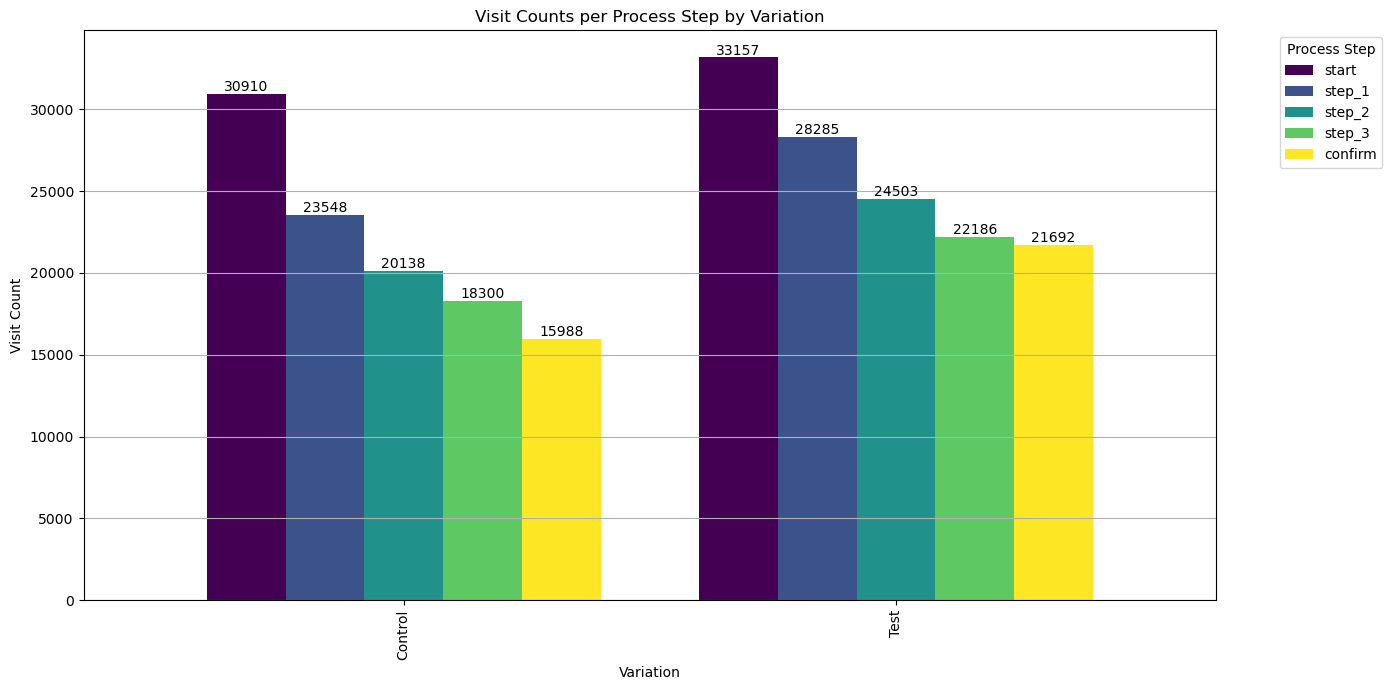

In [ ]:
def visualize_grouped_bar_chart_with_labels(df):
    # Filter out the 'total_drop' rows for plotting
    plot_df = df[df['process_step'] != 'total_drop']
    
    # Pivot the data for easier plotting, ensuring 'confirm' is the last column
    pivot_df = plot_df.pivot(index='variation', columns='process_step', values='visit_count')
    pivot_df = pivot_df[['start', 'step_1', 'step_2', 'step_3', 'confirm']]
    
    # Plot the grouped bar chart
    ax = pivot_df.plot(kind='bar', figsize=(14, 7), colormap='viridis', width=0.8)
    
    # Add titles and labels
    plt.title('Visit Counts per Process Step by Variation')
    plt.xlabel('Variation')
    plt.ylabel('Visit Count')
    plt.legend(title='Process Step', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    
    # Add labels to the bars
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5),
                        textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming visit_counts_per_step is the result from count_visit_ids_per_process_step function
visualize_grouped_bar_chart_with_labels(count_visit_ids_per_process_step)

# KPI-4.Support

### How the call center is solicited in each group? by which segments of users (age, gender, tenure_month) ?

In [ ]:
df_cleaned_no_duplicated_confirms_step.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time,date,completed_yes_no,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,1,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,0,242
2,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09,0,242
3,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09,0,242
4,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,2017-04-09,0,242


In [ ]:
### How the call center is solicited in each group? by which segments of users (age, gender, tenure_month) ?
def total_calls_per_group_gender(df):
    # Group by 'variation' and calculate the total calls in 'calls_6_month'
    total_calls_variation = df.groupby('variation')['calls_6_month'].sum().reset_index()

    # Calculate the percentage increase between 'Test' and 'Control' for overall calls
    control_calls = total_calls_variation[total_calls_variation['variation'] == 'Control']['calls_6_month'].values[0]
    test_calls = total_calls_variation[total_calls_variation['variation'] == 'Test']['calls_6_month'].values[0]
    
    overall_percentage_increase = ((test_calls - control_calls) / control_calls) * 100

    # Group by 'variation' and 'gender' and calculate the total calls in 'calls_6_month'
    total_calls_gender = df.groupby(['variation', 'gender'])['calls_6_month'].sum().reset_index()

    # Calculate the percentage increase between 'Test' and 'Control' for each gender
    gender_percentage_increase = {}
    genders = df['gender'].unique()
    for gender in genders:
        control_calls_gender = total_calls_gender[(total_calls_gender['variation'] == 'Control') & (total_calls_gender['gender'] == gender)]['calls_6_month'].values
        test_calls_gender = total_calls_gender[(total_calls_gender['variation'] == 'Test') & (total_calls_gender['gender'] == gender)]['calls_6_month'].values
        if len(control_calls_gender) > 0 and len(test_calls_gender) > 0:  # Ensure there is data for both groups
            control_calls_gender = control_calls_gender[0]
            test_calls_gender = test_calls_gender[0]
            gender_percentage_increase[gender] = ((test_calls_gender - control_calls_gender) / control_calls_gender) * 100

    return total_calls_variation, total_calls_gender, overall_percentage_increase, gender_percentage_increase

# Example usage:
# Assuming your dataframe is named df_cleaned_no_duplicated_confirms_step
total_calls_variation, total_calls_gender, overall_percentage_increase, gender_percentage_increase = total_calls_per_group_gender(df_cleaned_no_duplicated_confirms_step)

# Convert results to DataFrames for better display
df_total_calls_variation = pd.DataFrame(total_calls_variation)
df_total_calls_gender = pd.DataFrame(total_calls_gender)

# Create a DataFrame for overall percentage increase
df_overall_percentage_increase = pd.DataFrame({
    'Comparison': ['Overall'],
    'Percentage Increase': [overall_percentage_increase]
})

# Create a DataFrame for gender percentage increase
df_gender_percentage_increase = pd.DataFrame(list(gender_percentage_increase.items()), columns=['Gender', 'Percentage Increase'])

# Display results
print("Total Calls by Variation:")
print(df_total_calls_variation)
print("\nTotal Calls by Variation and Gender:")
print(df_total_calls_gender)
print(f"\nOverall Percentage Increase in Calls (Test vs Control): {overall_percentage_increase:.2f}%")
print("\nPercentage Increase in Calls by Gender (Test vs Control):")
df_gender_percentage_increase


Total Calls by Variation:
  variation  calls_6_month
0   Control         454782
1      Test         552032

Total Calls by Variation and Gender:
  variation gender  calls_6_month
0   Control      F         130974
1   Control      M         169518
2   Control      U         154290
3      Test      F         166880
4      Test      M         205370
5      Test      U         179749
6      Test      X             33

Overall Percentage Increase in Calls (Test vs Control): 21.38%

Percentage Increase in Calls by Gender (Test vs Control):


,Gender,Percentage Increase
0,U,16.500745
1,M,21.149376
2,F,27.414601


# KPI-5.Usage of new and old design.

### How often the user in each group logons_6_month ? by which segments of users (age, gender, tenure_month) ?

In [ ]:
import pandas as pd

def total_logons_per_group_gender(df):
    # Group by 'variation' and calculate the total logons in 'logons_6_month'
    total_logons_variation = df.groupby('variation')['logons_6_month'].sum().reset_index()

    # Calculate the percentage increase between 'Test' and 'Control' for overall logons
    control_logons = total_logons_variation[total_logons_variation['variation'] == 'Control']['logons_6_month'].values[0]
    test_logons = total_logons_variation[total_logons_variation['variation'] == 'Test']['logons_6_month'].values[0]
    
    overall_percentage_increase = ((test_logons - control_logons) / control_logons) * 100

    # Group by 'variation' and 'gender' and calculate the total logons in 'logons_6_month'
    total_logons_gender = df.groupby(['variation', 'gender'])['logons_6_month'].sum().reset_index()

    # Calculate the percentage increase between 'Test' and 'Control' for each gender
    gender_percentage_increase = {}
    genders = df['gender'].unique()
    for gender in genders:
        control_logons_gender = total_logons_gender[(total_logons_gender['variation'] == 'Control') & (total_logons_gender['gender'] == gender)]['logons_6_month'].values
        test_logons_gender = total_logons_gender[(total_logons_gender['variation'] == 'Test') & (total_logons_gender['gender'] == gender)]['logons_6_month'].values
        if len(control_logons_gender) > 0 and len(test_logons_gender) > 0:  # Ensure there is data for both groups
            control_logons_gender = control_logons_gender[0]
            test_logons_gender = test_logons_gender[0]
            gender_percentage_increase[gender] = ((test_logons_gender - control_logons_gender) / control_logons_gender) * 100

    return total_logons_variation, total_logons_gender, overall_percentage_increase, gender_percentage_increase

# Example usage:
# Assuming your dataframe is named df_cleaned_no_duplicated_confirms_step
total_logons_variation, total_logons_gender, overall_percentage_increase, gender_percentage_increase = total_logons_per_group_gender(df_cleaned_no_duplicated_confirms_step)

print("Total Logons by Variation:")
print(total_logons_variation)
print("\nTotal Logons by Variation and Gender:")
print(total_logons_gender)
print("\nOverall Percentage Increase in Logons (Test vs Control):")
print(overall_percentage_increase)
print("\nPercentage Increase in Logons by Gender (Test vs Control):")
gender_percentage_increase


Total Logons by Variation:
  variation  logons_6_month
0   Control          877239
1      Test         1077278

Total Logons by Variation and Gender:
  variation gender  logons_6_month
0   Control      F          265507
1   Control      M          311992
2   Control      U          299740
3      Test      F          340474
4      Test      M          381174
5      Test      U          355573
6      Test      X              57

Overall Percentage Increase in Logons (Test vs Control):
22.80324974151856

Percentage Increase in Logons by Gender (Test vs Control):


{'U': 18.6271435243878, 'M': 22.174286520167183, 'F': 28.23541375556953}